# Exploratory Data Analysis of Amazon Sales Data to chacek the buyers preference
Exploratory Data Analysis (EDA) helps uncover buyer preferences in Amazon Sales Data by analyzing patterns, trends, and correlations within the data, utilizing statistical methods and visualizations to identify popular products, customer behavior, and purchase patterns. Commonly used tools and libraries for EDA include Python's Pandas, Matplotlib, Seaborn, and statistical techniques like summary statistics, count, histograms, and scatter plots.


In [ ]:
# Importing the nessasary libralries required for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# It's often used for data manipulation, analysis, and exploration because it allows easy handling of tabular data and offers various functionalities to work with the data effectively.
df = pd.read_csv('Amazon Sale Report.csv', encoding='unicode_escape', low_memory=False)

In [ ]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
56933,56932,405-1061959-2438738,05-25-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,...,INR,493.0,Bangalore,KARNATAKA,560036.0,IN,False,NaN,NaN,NaN
56934,56933,405-2361514-2287560,05-25-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,XL,Shipped,...,INR,599.0,MUMBAI,MAHARASHTRA,400078.0,IN,False,NaN,NaN,NaN
56935,56934,408-6159119-1449106,05-25-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,499.0,GHAZIABAD,UTTAR PRADESH,201002.0,IN,False,NaN,NaN,NaN
56936,56935,408-8552934-2101155,05-25-22,Cancelled,Amazon,Amazon.in,Expedited,Trousers,XL,Cancelled,...,NaN,NaN,NEW TOWN,WEST BENGAL,700156.0,IN,False,NaN,NaN,NaN
56937,56936,408-4103938-9625932,05-25-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56938 entries, 0 to 56937
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               56938 non-null  int64  
 1   Order ID            56938 non-null  object 
 2   Date                56938 non-null  object 
 3   Status              56937 non-null  object 
 4   Fulfilment          56937 non-null  object 
 5   Sales Channel       56937 non-null  object 
 6   ship-service-level  56937 non-null  object 
 7   Category            56937 non-null  object 
 8   Size                56937 non-null  object 
 9   Courier Status      56937 non-null  object 
 10  Qty                 56937 non-null  float64
 11  currency            53478 non-null  object 
 12  Amount              53478 non-null  float64
 13  ship-city           56922 non-null  object 
 14  ship-state          56922 non-null  object 
 15  ship-postal-code    56922 non-null  float64
 16  ship

# Data Cleaning

In [ ]:
df.isnull()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
56934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
56935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
56936,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,True,True,True


In [ ]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    1
Fulfilment                1
Sales Channel             1
ship-service-level        1
Category                  1
Size                      1
Courier Status            1
Qty                       1
currency               3460
Amount                 3460
ship-city                16
ship-state               16
ship-postal-code         16
ship-country             16
B2B                       1
fulfilled-by          39471
New                   56938
PendingS              56938
dtype: int64

In [ ]:
df.drop(['New','PendingS'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56938 entries, 0 to 56937
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               56938 non-null  int64  
 1   Order ID            56938 non-null  object 
 2   Date                56938 non-null  object 
 3   Status              56937 non-null  object 
 4   Fulfilment          56937 non-null  object 
 5   Sales Channel       56937 non-null  object 
 6   ship-service-level  56937 non-null  object 
 7   Category            56937 non-null  object 
 8   Size                56937 non-null  object 
 9   Courier Status      56937 non-null  object 
 10  Qty                 56937 non-null  float64
 11  currency            53478 non-null  object 
 12  Amount              53478 non-null  float64
 13  ship-city           56922 non-null  object 
 14  ship-state          56922 non-null  object 
 15  ship-postal-code    56922 non-null  float64
 16  ship

In [ ]:
df.shape

(56938, 19)

In [ ]:
## Droping the null values
df.dropna(inplace  = True)

In [ ]:
df.shape

(37514, 19)

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
df['ship-postal-code'] = df['ship-postal-code'].astype(int)
df['ship-postal-code'].dtype

dtype('int64')

In [ ]:
df['Date']=pd.to_datetime (df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,16702.000000,16702.000000,16702.000000,16702.000000
mean,25499.464675,0.865166,617.488738,460259.093821
std,15615.372879,0.356314,272.546867,197934.801998
min,0.000000,0.000000,0.000000,110001.000000
25%,11917.500000,1.000000,442.000000,332001.000000
50%,23513.000000,1.000000,574.000000,500003.000000
75%,38077.500000,1.000000,744.000000,600044.000000
max,56931.000000,5.000000,5495.000000,989898.000000


In [ ]:
df.describe(include = 'object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,B2B,fulfilled-by
count,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702,16702
unique,15385,8,1,1,1,8,11,2,1,2863,52,1,2,1
top,404-9932919-6662730,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,False,Easy Ship
freq,11,13368,16702,16702,16702,7023,3114,14384,16702,1193,2827,16702,16558,16702


In [ ]:
#useing describe() for specific columns
df[['Qty','Amount']].describe()

,Qty,Amount
count,16702.000000,16702.000000
mean,0.865166,617.488738
std,0.356314,272.546867
min,0.000000,0.000000
25%,1.000000,442.000000
50%,1.000000,574.000000
75%,1.000000,744.000000
max,5.000000,5495.000000


## EDA- Exploratory data analysis

In [ ]:

df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

Size

<Figure size 800x600 with 0 Axes>

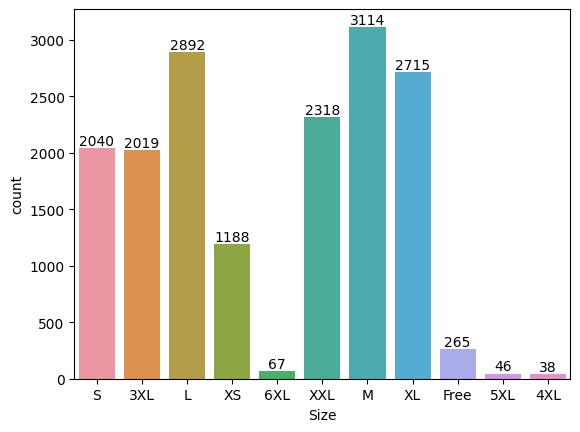

<Figure size 800x600 with 0 Axes>

In [ ]:
ax=sns.countplot(x='Size' ,data=df)
for bars in ax.containers:
    ax.bar_label(bars)

plt.figure(figsize=(8, 6))

Note: The graph above shows that the majority of consumers purchase M-Size.

Group By
The groupby() function in pandas is used to group data based on one or more columns in a DataFrame

In [ ]:
S_Qty = df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
S_Qty

,Size,Qty
6,M,2686.0
5,L,2519.0
8,XL,2352.0
10,XXL,2018.0
0,3XL,1777.0
7,S,1752.0
9,XS,992.0
4,Free,222.0
3,6XL,59.0
2,5XL,40.0


<Figure size 1000x500 with 0 Axes>

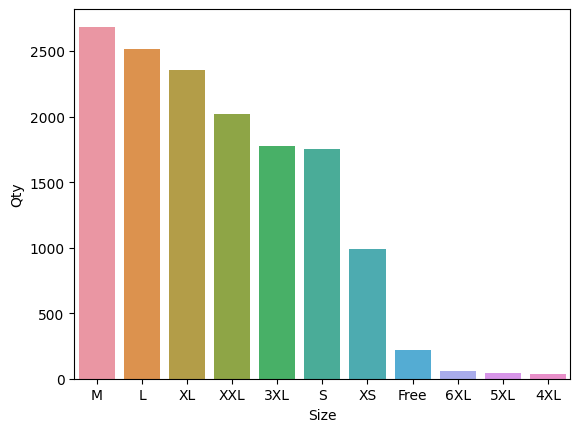

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.barplot(x='Size',y='Qty', data=S_Qty)
plt.figure(figsize=(10,5))

Note: From above Graph you can see that most of the Qty buys M-Size in the sales

In [ ]:
# Converting the data type into string
df['Category'] = df['Category'].astype(str)

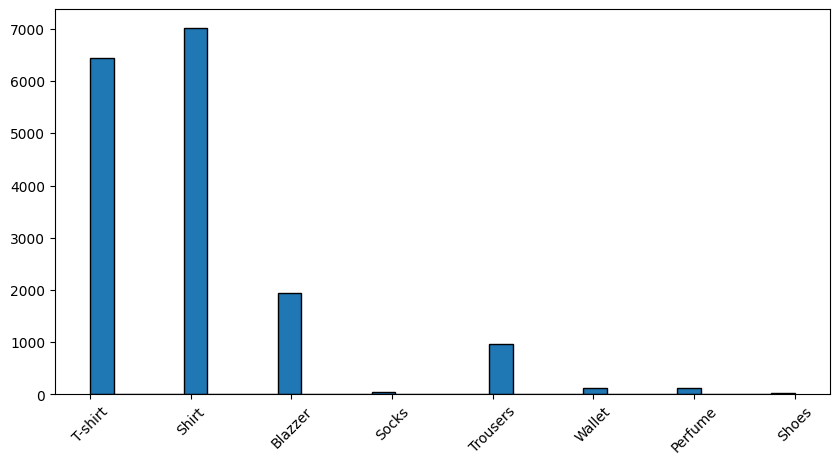

In [ ]:
column_data = df['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data, bins = 30, edgecolor = 'Black')
plt.xticks(rotation=45)
plt.show()

Note: From above Graph you can see that most of the buyers are T-shirt

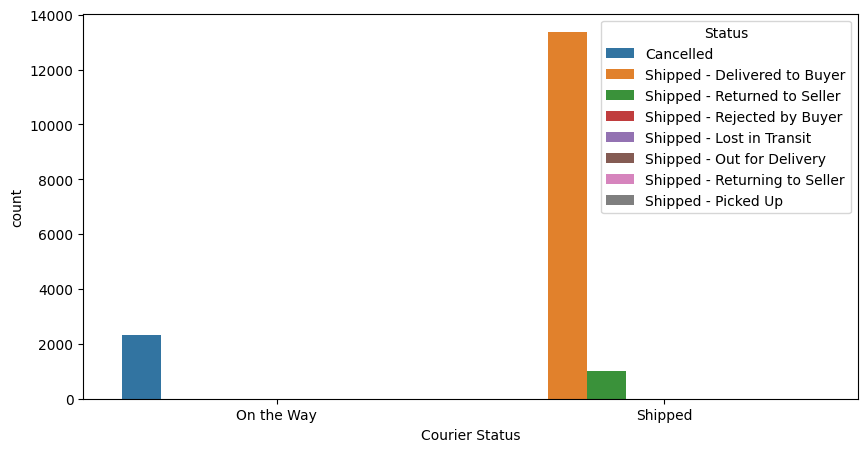

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = 'Courier Status', hue = 'Status')
plt.show()

Note: From above Graph the majority of the orders are shipped through the courier.

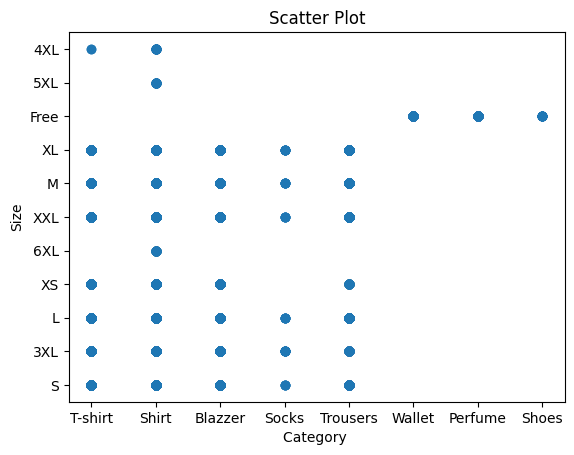

In [ ]:
# Prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

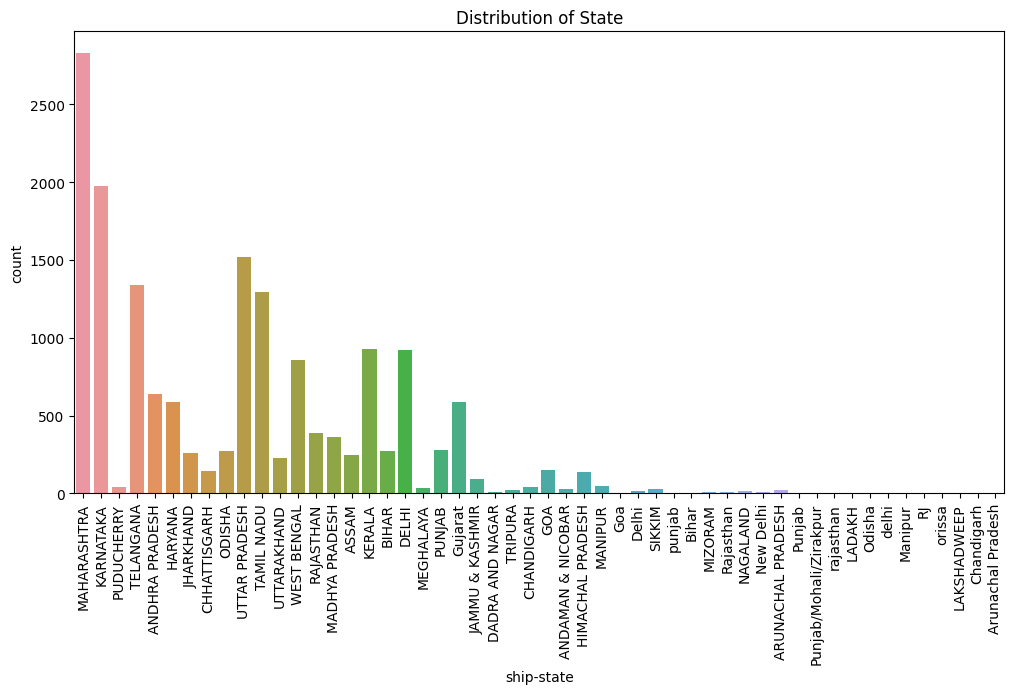

In [ ]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

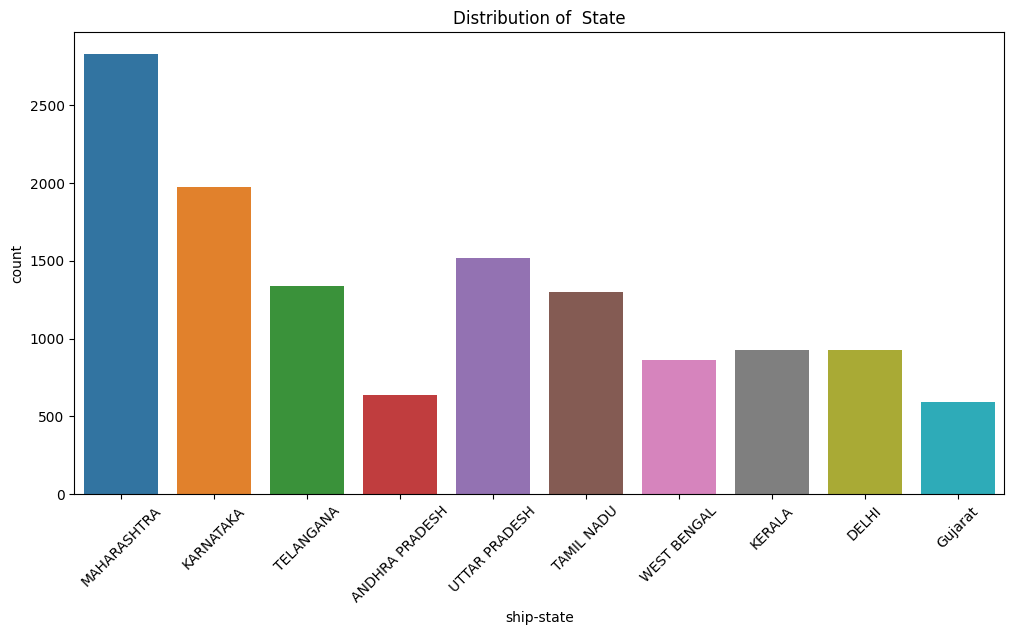

In [ ]:
# top_10_States
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

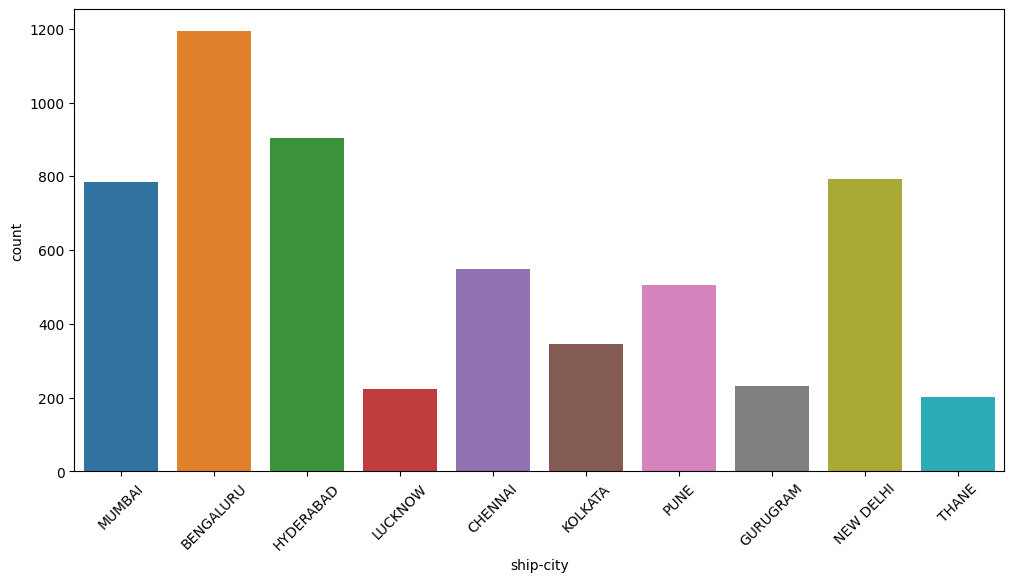

In [ ]:
# top_10_States
top_10_state = df['ship-city'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-city'].isin(top_10_state.index)], x='ship-city')
plt.xlabel('ship-city')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Note: The graph above indicates that the majority of purchasers are from the state of Maharashtra.

## Conclusion
The data analysis highlights a substantial customer presence in Maharashtra state, primarily catering to retailers by fulfilling orders through Amazon. It indicates a strong demand for T-shirts, with buyers showing a notable preference for M-Size products.